
## محاكاة نظام تحديد الموقع الجغرافي والارتفاع
## GPS System Simulation for Location and Altitude Determination

### مواصفات النظام
يتكون من 32 قمرًا صناعيًا مع إمكانية الاتصال مع 12 قمرًا كحد أقصى.

يمكنه تحديد الموقع الجغرافي عند الاتصال بـ 3 أقمار صناعية.

يمكنه قياس الارتفاع عن سطح البحر عند الاتصال بـ 4 أقمار صناعية.


### System Specifications:
Comprises 32 satellites with the capability to connect with up to 12 at a time.

Can determine geographic location by connecting with 3 satellites.

Can measure altitude above sea level by connecting with 4 satellites.

### تفاصيل النظام:

يستخدم تقنية الطيف المنتشر عبر شفرات PN code.

كل شفرة تتكون من 1024 بت.

يقوم المستقبل عند استقبال الإشارة بعملية correlation بين الإشارات المستقبلة والإشارات المسجلة مسبقًا. إذا كانت الإشارة صحيحة (حصلت على أعلى قيمة)، يقوم بفك التشفير واستخلاص البيانات.

تفاصيل شفرات PN code:

Auto / Cross Correlation

### system details
Uses Spread Spectrum technology via PN code.

Each code consists of 1024 bits.

When the receiver receives a signal, it performs a correlation between the received signals and pre-recorded signals. If the signal is correct (obtains the highest value), it decodes it and extracts the data.

Details of PN codes: Auto / Cross Correlation.

### خطوات عمل النظام
توليد 32 كود PN كمحاكاة للأقمار الصناعية.

تشفير الأكواد وتعديلها.

استقبال الإشارة بواسطة المستقبل.

فك تعديل الإشارة وحساب الـ Auto-correlation. إذا كانت العملية صحيحة، يقوم بفك التشفير واستخلاص البيانات.

محاكاة واقعية لحساب الموقع (خط العرض والارتفاع) باستخدام 3 أقمار صناعية عشوائية.

محاكاة واقعية لحساب الارتفاع عن سطح البحر باستخدام 4 أقمار صناعية عشوائية.

### System Steps:
Generates 32 PN codes to simulate the satellite.

Encodes and modulates the codes.

The receiver receives the signal.

The receiver demodulates the signal and calculates the Auto-correlation. If the process is correct, it decodes it accurately and extracts the data.

Realistic simulation to calculate the location (Latitude & Altitude) using 3 random satellites.

Realistic simulation to calculate the altitude above sea level using 4 random satellites.

---

# code

Libraries and Imports:

- NumPy: Math and array operations
- Matplotlib: Creating graphs
- SciPy Signal: Signal processing
- Random: Generating random data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import random

PN Code Generation Function

Random Bits Generation

> simulate the generation of 32 satellite signals and plot an examples of 2 satellites

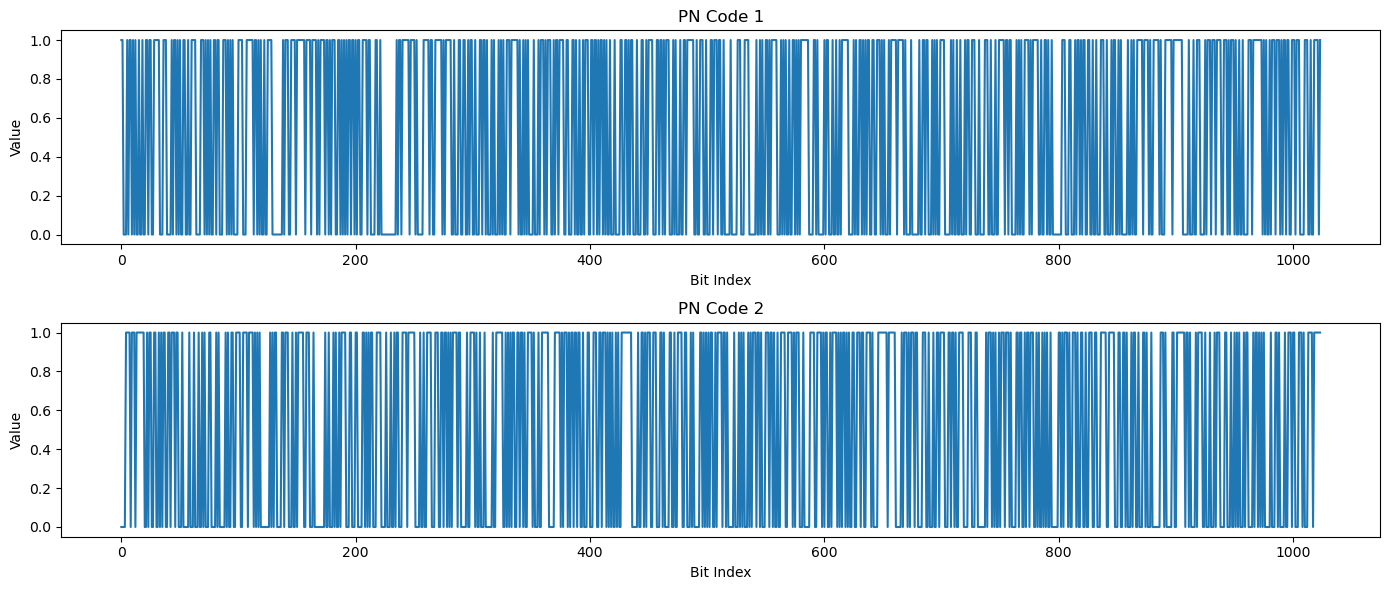

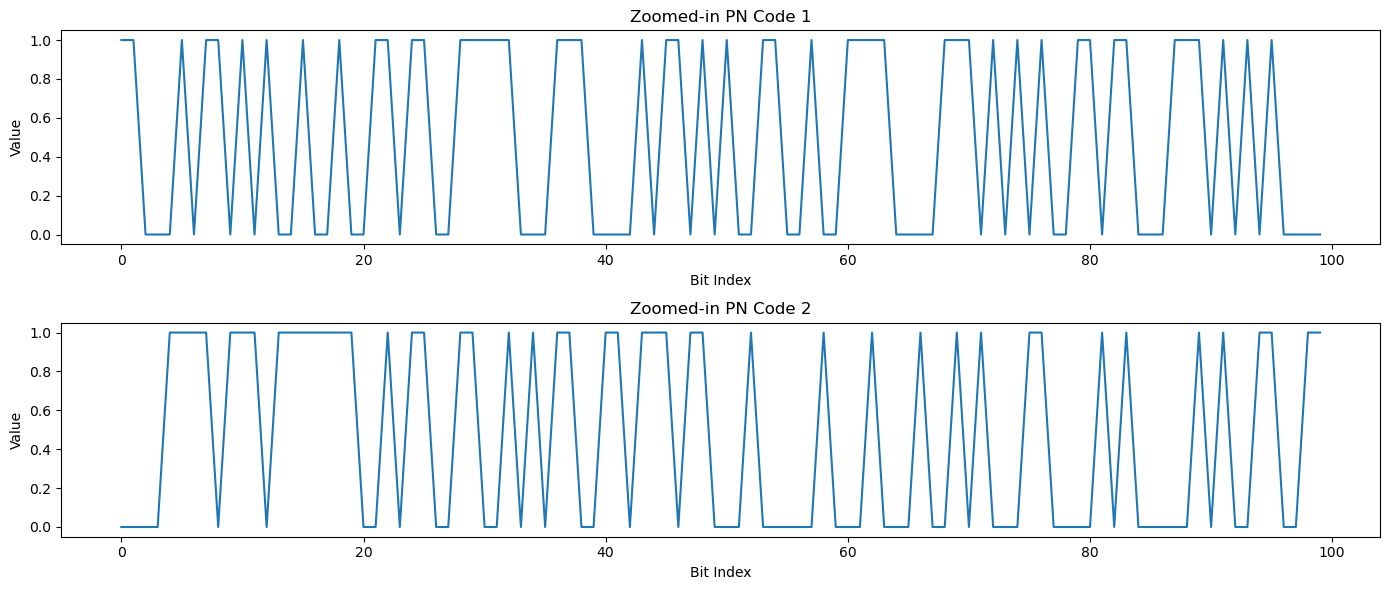

In [3]:
def generate_pn_code(length):
    """Generate PN code with values 0 and 1"""
    return np.random.choice([0, 1], size=length)

# Generate 32 PN codes, each 1024 bits long
pn_codes = [generate_pn_code(1024) for _ in range(32)]


pn_code_x = pn_codes[0]
pn_code_y = pn_codes[1]

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(pn_code_x)
plt.title("PN Code 1")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.subplot(2, 1, 2)
plt.plot(pn_code_y)
plt.title("PN Code 2")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()



# Define the range to zoom in on
zoom_range = 100

# Plot the zoomed-in signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(pn_code_x[:zoom_range])
plt.title("Zoomed-in PN Code 1")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.subplot(2, 1, 2)
plt.plot(pn_code_y[:zoom_range])
plt.title("Zoomed-in PN Code 2")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


BPSK Modulation

- Converts binary bits to phase shifts
- Transforms 0/1 to -1/1 values
- Encodes information in signal phase

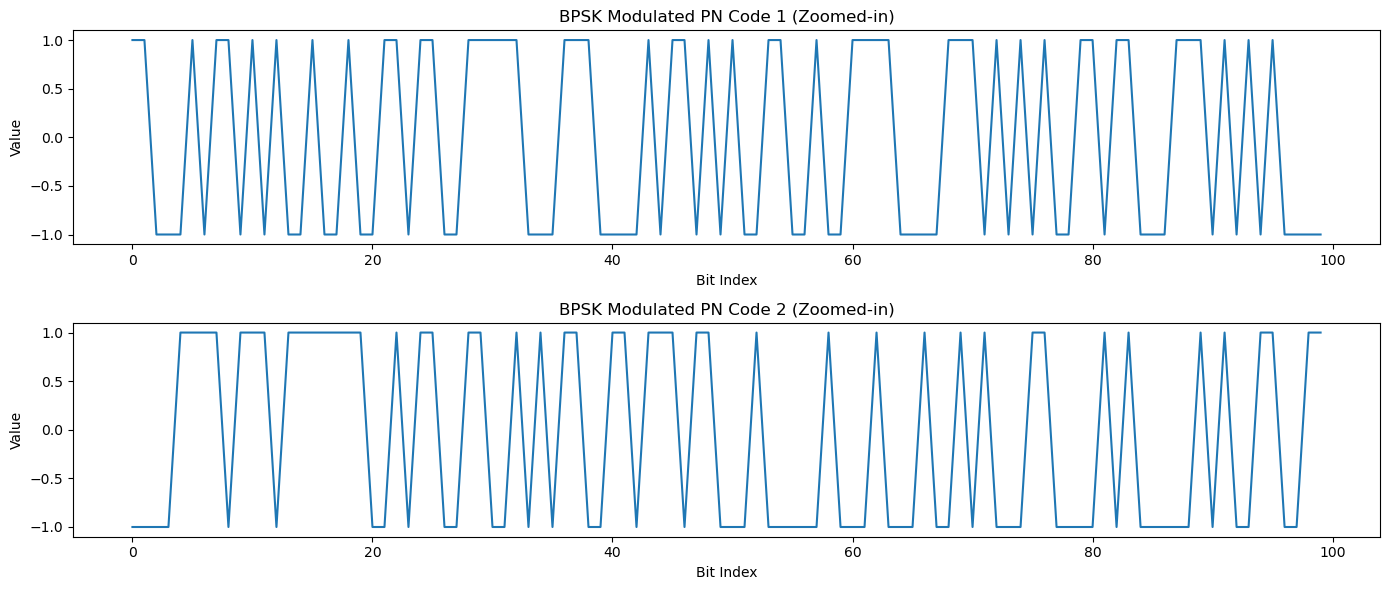

In [4]:
def bpsk_modulate(pn_code):
    """Modulate a PN code using BPSK, converting 0 to -1 and 1 to 1"""
    return np.where(np.array(pn_code) == 1, 1, -1)

# Modulate all 32 PN codes
bpsk_modulated_signals = [bpsk_modulate(code) for code in pn_codes]

# Plot the modulated signals for the first two PN codes (zoomed-in view for clarity)
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(bpsk_modulated_signals[0][:zoom_range])
plt.title("BPSK Modulated PN Code 1 (Zoomed-in)")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.subplot(2, 1, 2)
plt.plot(bpsk_modulated_signals[1][:zoom_range])
plt.title("BPSK Modulated PN Code 2 (Zoomed-in)")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


Noise Addition

- Simulates real-world signal conditions
- Adds Gaussian random noise

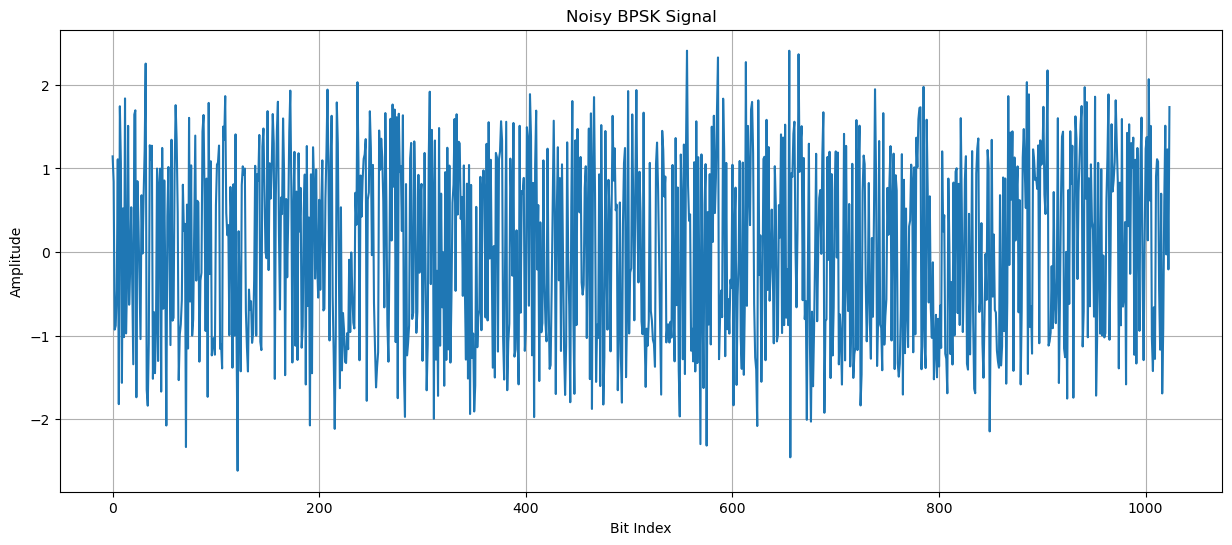

In [20]:
# Parameters
fs = 1024  # Sampling frequency
A_n = 0.5  # Noise amplitude

# Time vector for plotting (assuming bit duration is 1 sample)
t = np.arange(0, fs)

# Signal to transmit (one of the BPSK modulated signals)
x = bpsk_modulated_signals[0]

# Additive noise
noise = A_n * np.random.normal(size=fs)
noisy_x = x + noise

# Plotting the noisy signal
plt.figure(figsize=(15, 6))
plt.plot(t, noisy_x)
plt.title("Noisy BPSK Signal")
plt.xlabel("Bit Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Signal Correlation & DEcoding

Best match index: 0
Highest correlation value: 1038.4318376969072


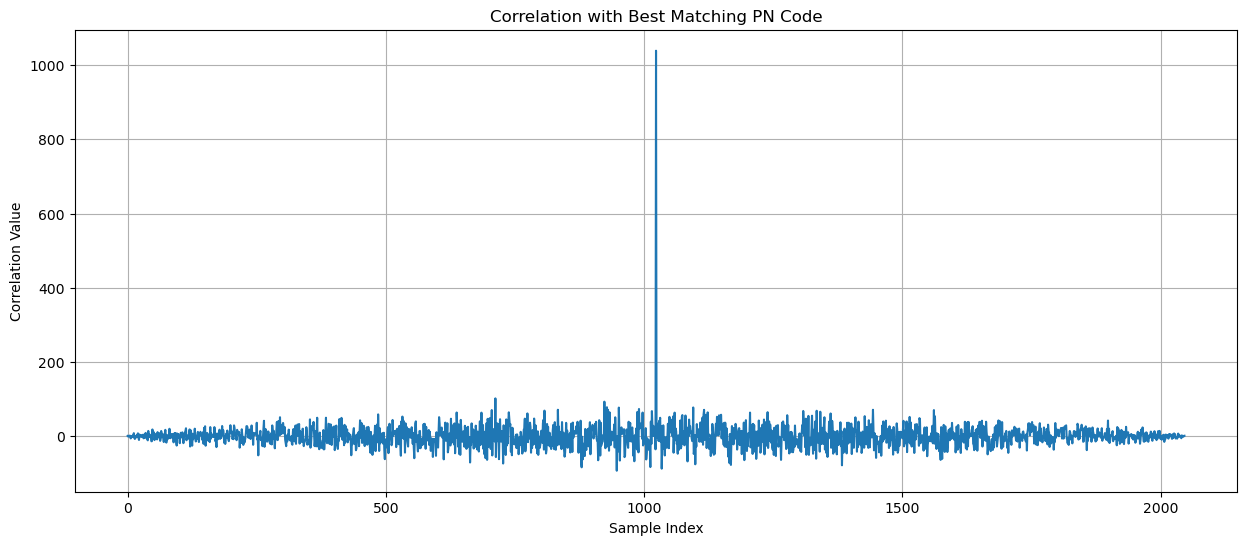

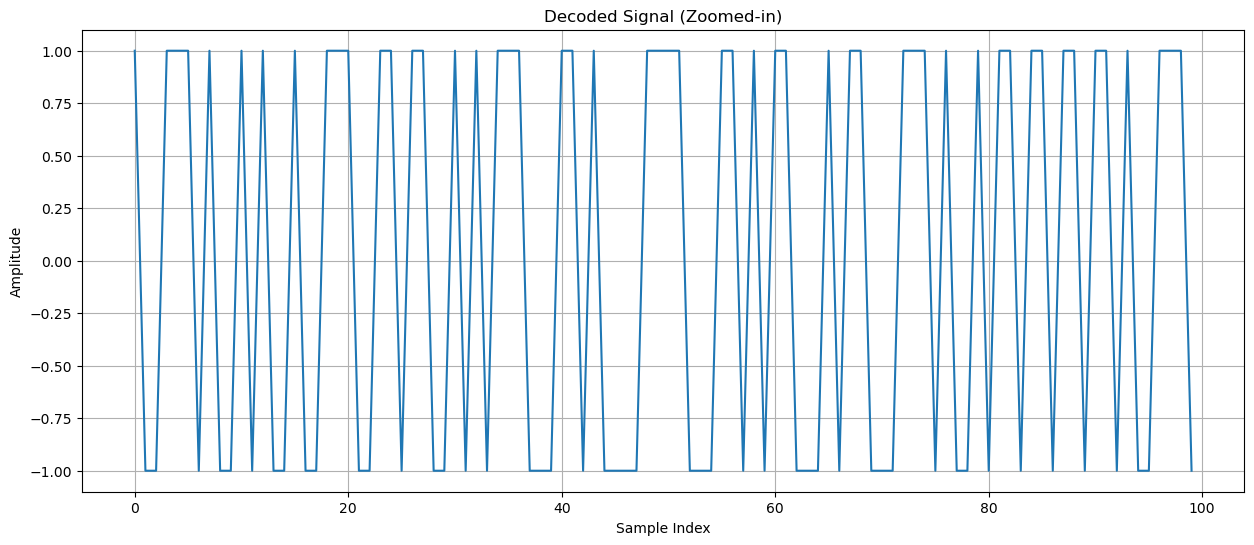

In [21]:
def correlate(received_signal, pn_code):
    # Compute the correlation between the received signal and a PN code
    modulated_pn_code = bpsk_modulate(pn_code)
    correlation = np.correlate(received_signal, modulated_pn_code, mode='full')
    return correlation

# Find the best matching PN code
correlations = [correlate(noisy_x, code) for code in pn_codes]
best_match_index = np.argmax([np.max(c) for c in correlations])
best_match_code = pn_codes[best_match_index]

print(f"Best match index: {best_match_index}")
print(f"Highest correlation value: {np.max(correlations[best_match_index])}")

# Decode the entire received signal using the best matching PN code
best_correlation = correlations[best_match_index]
decoded_signal = np.sign(best_correlation)  # Simplified example of decoding

# Correlation plot for the best matching PN code
plt.figure(figsize=(15, 6))
plt.plot(best_correlation)
plt.title("Correlation with Best Matching PN Code")
plt.xlabel("Sample Index")
plt.ylabel("Correlation Value")
plt.grid()
plt.show()

# Plot the decoded signal (zoomed-in view for clarity)
plt.figure(figsize=(15, 6))
plt.plot(decoded_signal[:zoom_range])
plt.title("Decoded Signal (Zoomed-in)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

### Location and Altitude Calculation
> select randon 3 PN code (sattelites) and use it to calculate the location
> select random 4 satellites to calculate altitude

In [7]:
# Select three random PN codes (simulated satellites)
random_satellites_indices = random.sample(range(32), 3)
random_satellites = [pn_codes[i] for i in random_satellites_indices]

print("Selected 4 satellites:", random_satellites_indices)

Selected 4 satellites: [24, 10, 22]


In [15]:
def calculate_location(sat_signals):
    return [sum(signal) for signal in sat_signals]

location = calculate_location(random_satellites)
print("Location: ", location)

Location:  [497, 512, 511]


In [16]:
# Select four random PN codes (simulated satellites)
random_altitude_sat_indices = random.sample(range(32), 4)
random_altitude_sats = [pn_codes[i] for i in random_altitude_sat_indices]

print("Selected 4 satellites: ",random_altitude_sat_indices)

Selected 4 satellites:  [30, 16, 10, 29]


In [18]:
def calculate_altitude(sat_signals):
    return sum([sum(signal) for signal in sat_signals]) / len(sat_signals)

altitude = calculate_altitude(random_altitude_sats)
print("Altitude: ", altitude, "Km")

Altitude:  517.0 Km


---
*some codes are generated by ai*

*some comments are generated by ai*